<a href="https://colab.research.google.com/github/AbrahamKong/-CMPE257-NLP_Poem_Part_2/blob/main/NLP_Poem_Scraping_9b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

#NLP Part 1 : Poetry Analysis

*   NLP Basics
*   NER, POS, vectorization / embeddings
*   Word2Vec, Glove, Cove, FastText, etc.
*.  Similarity of words, context




1. NLP Data. Pick 2 poets, scrape 10 poems each . Put them in a json datastructure and save it under the poets name, in your team drive under folder 'DataSets' in the drive shared with you. 

2. CLAIM YOUR POETS!!! Note: your team has  to claim their 2 poets by entering in their names in this spreadsheet with a timestamp of when you entered this: no duplicate poets allowed !
https://docs.google.com/spreadsheets/d/1-KQVrGrbz5PvLhJNXhWm55WPIpmJPvsQQ2r9U-ZieGw/edit#gid=0

---for each poem of each poet:
3. Run POS and extract verbs, nouns and adjectives (use notebook given as an example)

4. Summarize each poem 

5. Store the summary, POS data in your json poet data structure and save to disk.

6. Interchange the verbs and adjectives of the two poets based on similar words in the other poets vocabulary of verbs and adjectives

6. a. save the data structure for the new poems:  poet1-poet2-poem1.json (replace poet1 adjectives and verbs with poet2's ) and poet2-poet1-poem1.json 

6. b. print out the new poems and save them to disk poet1-poet2.txt and poet2-poet1.txt [these files will contain 10 poems each)].
remember to measure and compare the cohesion and perplexity of the original poems and the new poems you generate !!

7. Combine poet1's and poet2's poem text and summarize it using the transformer

8. Run topic modeling on the combined text of each poet: what are the top 5 topics they are writing about?

9. Name the topics: use the new notebook : name_your_topic_background.ipynb (Links to an external site.) , to try and find the closest word that describes topic 0, topic 1, topic 2 : instead of topic 0, what is the closest word in that cluster that describes the topic?

# Claim 2 poets and Scrape 10 poems each
John Keats
Alfred Tennyson    

Scraping example colab: https://colab.research.google.com/drive/1Px_UggyRiQJzrIxvLtitz-Es0aZ5Au8b?authuser=3#scrollTo=3aTGAo7rMvjN&uniqifier=1



In [1]:
# !pip install nltk
# !pip install gensim
# !pip install transformers
# !pip install sentence-transformers
# !pip install pyLDAvis
# !pip install spacy

     |████████████████████████████████| 4.0 MB 4.8 MB/s 
     |████████████████████████████████| 895 kB 36.2 MB/s 
     |████████████████████████████████| 6.6 MB 33.5 MB/s 
     |████████████████████████████████| 77 kB 3.6 MB/s 
     |████████████████████████████████| 596 kB 13.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 10.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=8d9756a4763855bc685b9c5160c2e5abd8deb4ebc82ed4288147bcd7629938eb
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements 

In [2]:
# !pip install contractions

     |████████████████████████████████| 287 kB 6.0 MB/s 
     |████████████████████████████████| 106 kB 24.9 MB/s 


In [3]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 5.2 MB/s 
     |████████████████████████████████| 10.9 MB 11.6 MB/s 
     |████████████████████████████████| 102 kB 11.0 MB/s 
     |████████████████████████████████| 690 kB 48.9 MB/s 
     |████████████████████████████████| 3.1 MB 40.0 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 303 kB 8.6 MB/s 
     |████████████████████████████████| 812 kB 33.4 MB/s 
     |████████████████████████████████| 38.1 MB 50.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=db2db3720ee5af0a4f43902e6740211c018e7b2ef3e1424423a1d3cb650aadbf
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=4ab94e2d5407911582c3dad9b24c2d2d2c0bae2f9dba2d49aa1ef3696de76aa3
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3

In [4]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import wordcloud
import nltk
import unicodedata
import contractions
import pickle
import urllib.request
import requests
import spacy
import json
%matplotlib inline

from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from contractions import contractions_dict
from scipy import stats
from scipy import sparse

import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# NLP Data. Pick 2 poets, scrape 10 poems each . Put them in a json datastructure and save it under the poets name, in your team drive under folder 'DataSets'

## Get Scraped Data

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
# df_john = pd.read_csv('/content/drive/MyDrive/DataSets/john_keats.csv', sep=';')
lh_df = pd.read_csv('https://raw.githubusercontent.com/AbrahamKong/-CMPE257-NLP_Poem_Part_2/main/langston_hughes.csv')

In [7]:
lh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [8]:
# df_alfred = pd.read_csv('/content/drive/MyDrive/DataSets/alfred_tennyson.csv', sep=';')
mjo_df = pd.read_csv('https://raw.githubusercontent.com/AbrahamKong/-CMPE257-NLP_Poem_Part_2/main/mary_j_oliver.csv')

In [9]:
mjo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


## JSON Conversion

In [10]:
result_lh = lh_df.to_json(orient="index")
parsed_lh = json.loads(result_lh)
json.dumps(parsed_lh, indent=4)

'{\n    "0": {\n        "Title": "Mother To Son",\n        "Poem": "well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor\\u2014 bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps cause you finds it kinder hard do not you fall now\\u2014 for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes"\n    },\n    "1": {\n        "Title": "The Ballad Of The Landlord",\n        "Poem": "landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you t

In [11]:
# with open('/content/drive/MyDrive/DataSets/john_keats_final.txt', 'w') as outfile:
#     json.dump(result_john, outfile)
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes.csv', 'w') as outfile:
    json.dump(result_lh, outfile)

In [12]:
result_mjo = mjo_df.to_json(orient="index")
parsed_mjo = json.loads(result_mjo)
json.dumps(parsed_mjo, indent=4)

'{\n    "0": {\n        "Title": "In Blackwater woods",\n        "Poem": "look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes"\n    },\n    "1": {\n        "Title": "The Journey",\n        "Poem": "one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house 

In [13]:
# with open('/content/drive/MyDrive/DataSets/alfred_tennyson_final.txt', 'w') as outfile:
#     json.dump(result_alfred, outfile)
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver.csv', 'w') as outfile:
    json.dump(result_mjo, outfile)

In [14]:
parsed_mjo["0"]

{'Poem': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'Title': 'In Blackwater woods'}

## Build JSON Structure

In [15]:
langston_hughes = {

}

mary_j_oliver = {

}

## Data Cleaning

In [16]:
def cleanPoemText(text):
    

    text = contractions.fix(text)
    
    text = text.strip().lower()
    
    text = re.sub(r"'", ' ', text)
    
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    text = ' '.join([w for w in text.split()])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

## Clean Poem Text

In [17]:
embedding = ''
def buildPoemArray(poet, data):
  poems = []
  for i in data:
    poem = data[i]["Poem"]

    clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = clean_poem
    poems.append(idx)
  poet['poems_array'] = poems


In [18]:
buildPoemArray(langston_hughes, parsed_lh)
buildPoemArray(mary_j_oliver, parsed_mjo)

In [19]:
langston_hughes

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [20]:
mary_j_oliver

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [21]:
langston_hughes_poems = langston_hughes.copy()
mary_j_oliver_poems = mary_j_oliver.copy()

# Run Part-Of-Speech, extract verbs, nouns and adjectives

In [22]:
def getPOS(poet):
  global_vrb= set()
  global_nns= set()
  global_adj= set()
  for key in poet['poems_array']:
    text = poet[key]
    wrd_list = word_tokenize(text)
    pos_val = nltk.pos_tag(wrd_list)
    poet["pos_"+key] = pos_val

    vrb = set([word for (word, pos) in pos_val if (pos.startswith('VB'))])
    nns = set([word for (word, pos) in pos_val if (pos.startswith('NN'))])
    adj = set([word for (word, pos) in pos_val if (pos.startswith('JJ'))])

    poet["verbs_"+key] = list(vrb)
    poet["adjectives_"+key] = list(adj)
    poet["nouns_"+key] = list(nns)

    global_vrb = set.union(global_vrb, vrb)
    global_nns = set.union(global_nns, nns)
    global_adj = set.union(global_adj, adj)

  poet['all_verbs'] = list(global_vrb)
  poet['all_nouns'] = list(global_nns)
  poet['all_adjectives'] = list(global_adj)

In [23]:
langston_hughes_pos = langston_hughes.copy()
getPOS(langston_hughes_pos)
langston_hughes_pos

{'adjectives_poem0': ['boy', 'light', 'crystal', 'educational'],
 'adjectives_poem1': ['um',
  'eviction',
  'noble',
  'last',
  'graphic',
  'mighty',
  'precinct',
  'able',
  'county',
  'new',
  'due',
  'high',
  'landlord',
  'basic',
  'final',
  'more',
  'old',
  'negro',
  'educational'],
 'adjectives_poem2': ['laugh',
  'poetryarchive',
  'america',
  'beautiful',
  'strong',
  'educational'],
 'adjectives_poem3': ['long',
  'black',
  'dark',
  'thousand',
  'bright',
  'educational'],
 'adjectives_poem4': ['sorrow',
  'dust',
  'white',
  'young',
  'light',
  'strong',
  'hope',
  'many',
  'great',
  'lonely',
  'right',
  'heavy',
  'free',
  'alternate',
  'long',
  'due',
  'hot',
  'true',
  'wide',
  'high',
  'dark',
  'deepest',
  'educational'],
 'adjectives_poem5': ['older',
  'new',
  'poetryarchive',
  'human',
  'muddy',
  'looked',
  'ancient',
  'young',
  'dusky',
  'www',
  'educational',
  'golden'],
 'adjectives_poem6': ['vibrant',
  'jet',
  'ecstasy'

In [24]:
langston_hughes

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [25]:
mary_j_oliver_pos = mary_j_oliver.copy()
getPOS(mary_j_oliver_pos)
mary_j_oliver_pos

{'adjectives_poem0': ['able',
  'long',
  'other',
  'salvation',
  'black',
  'rich',
  'own',
  'mortal',
  'educational',
  'blue'],
 'adjectives_poem1': ['full',
  'stiff',
  'terrible',
  'new',
  'very',
  'whole',
  'little',
  'only',
  'bad',
  'own',
  'old',
  'late',
  'educational',
  'deeper'],
 'adjectives_poem2': ['geese',
  'good',
  'soft',
  'educational',
  'clean',
  'wild',
  'clear',
  'deep',
  'hundred'],
 'adjectives_poem3': ['good',
  'happiness',
  'crazy',
  'white',
  'few',
  'nameless',
  'brawny',
  'sloppy',
  'many',
  'sharp',
  'important',
  'green',
  'proper',
  'satisfied',
  'necessary',
  'small',
  'better',
  'educational',
  'blue'],
 'adjectives_poem4': ['full',
  'sleepy',
  'flower',
  'soft',
  'little',
  'honeyed',
  'black',
  'thick',
  'deep',
  'enormous',
  'secret',
  'educational'],
 'adjectives_poem5': ['more',
  'next',
  'better',
  'stop',
  'passing',
  'educational'],
 'adjectives_poem6': ['complicated',
  'forth',
  'idl

In [26]:
mary_j_oliver

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

# Store the POS JSON Data to File

In [27]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes_pos_final.json', 'w') as outfile:
    json.dump(langston_hughes_pos, outfile)

In [28]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver_pos_final.json', 'w') as outfile:
    json.dump(mary_j_oliver_pos, outfile)

# Summarization using transformers

In [29]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [30]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [31]:
def getSummaryOfPoem(poet):
  def removeQuotes(mydata):
    new_data = mydata.strip('“”')
    return new_data
  count = 0
  for key in poet['poems_array']:
    count += 1;
    text = poet[key] 
    text = removeQuotes(text)
    summary_text = summarizer(text, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
    poet["summary_"+key] = summary_text
  
  return poet

In [32]:
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

import timeit

start = timeit.default_timer()

2022-04-20 14:29:22
2022-04-20 14:29:22


In [33]:
langston_hughes_sum = langston_hughes.copy()
mary_j_oliver_sum = mary_j_oliver.copy()
data_langston_hughes = getSummaryOfPoem(langston_hughes_sum)
data_mary_j_oliver = getSummaryOfPoem(mary_j_oliver_sum)

Your max_length is set to 512, but you input_length is only 144. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)
Your max_length is set to 512, but you input_length is only 284. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=142)
Your max_length is set to 512, but you input_length is only 110. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 512, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 512, but you input_length is only 466. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=233)
Your max_length is set to 512, but you input_length is only 170. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=85)
Your max_length is set to 512, but you input_length is only 218. You might

In [34]:


#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  1173.792996993


In [35]:
langston_hughes_sum

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [36]:
mary_j_oliver_sum

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [37]:
data_mary_j_oliver

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

# Store the summarized JSON Data to File

In [38]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes_summary_final.json', 'w') as outfile:
    json.dump(langston_hughes_sum, outfile)

In [39]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver_summary_final.json', 'w') as outfile:
    json.dump(mary_j_oliver_sum, outfile)

# Interchange the Verbs and Adjectives for both the poets using transformer

In [40]:
model = SentenceTransformer('stsb-roberta-large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [41]:
def getSemanticSimilarity(p1,p2):
  embedding1 = model.encode(p1, convert_to_tensor=True)
  embedding2 = model.encode(p2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
  print(cosine_scores) 
  similarity_score = cosine_scores.item()
  return similarity_score

In [42]:
getSemanticSimilarity(langston_hughes_pos['all_verbs'][0],mary_j_oliver_pos["all_verbs"][0])

tensor([[0.3606]], device='cuda:0')


0.36061060428619385

# Swapping the Verbs based on similarity score

In [43]:

def swapVerbs(p1,p2,text):
    for v1 in p1:
      for v2 in p2:
        score = getSemanticSimilarity(v1,v2)
        if score > 0.3:
          text = text.replace(v1,v2)
          print("verb")
          print(text)
          break
    return text

# Swapping the Adjectives based on similarity score

In [44]:
def swapAdjectives(p1,p2, poem):
  text = poem
  for a1 in p1:
    for a2 in p2:
      print("inside loop 2")
      print(a1)
      print(a2)
      print(text)
      score = getSemanticSimilarity(a1,a2)
      if score > 0.3:
        text = text.replace(a1,a2)
        print("adjective")
        print(text)
  return text

In [45]:
def swapIteration(poet1, poet2, text):
    p2_verbs = poet2["all_verbs"]
    p1_verbs = poet1["all_verbs"]
    p2_verbs = p2_verbs[0:2]
    p1_verbs = p1_verbs[0:2]
    print(p1_verbs)
    print(p2_verbs)
    new_text = swapVerbs(p1_verbs, p2_verbs, text)
    print("new text verbs")
    print(new_text)
    # print(text)
    p2_adjectives = poet2["all_adjectives"]
    p1_adjectives = poet1["all_adjectives"]
    p2_adjectives = p2_adjectives[0:2]
    p1_adjectives = p1_adjectives[0:2]
    brand_new_text = swapAdjectives(p1_adjectives, p2_adjectives, new_text)
    print("new text adjectives")
    print(brand_new_text)
    return brand_new_text

John Poems Swapped Verbs and Adjectives of Alfred Tennyson Poems

In [46]:
langston_hughes_poems_2 = langston_hughes_poems.copy()
langston_hughes_poems_2.pop('poems_array')
langston_hughes_poems_swapped=[]
for i in langston_hughes_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str = str(langston_hughes_poems[i]);
  print(poem_str)

  langston_hughes_poems_swapped.append(swapIteration(langston_hughes_pos, mary_j_oliver_pos, poem_str))


poems:
poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
['describes', 'believe']
['faces', 'left']
tensor([[0.3606]], device='cuda:0')
verb
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down 

# Printing the new poems after swapping

In [47]:
langston_hughes_poems_swapped

['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the street um h

## TODO: We need to format the poem in a human readable manner

 Alfred Tennyson Poems Swapped Verbs  and Adjectives of John Poems


In [48]:
mary_j_oliver_poems_swapped = []
mary_j_oliver_poems_2 = mary_j_oliver_poems.copy()
mary_j_oliver_poems_2.pop('poems_array')
for i in mary_j_oliver_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str_2 = str(mary_j_oliver_poems[i]);
  print(poem_str_2)

  mary_j_oliver_poems_swapped.append(swapIteration(langston_hughes_pos, mary_j_oliver_pos, poem_str_2))


poems:
poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
['describes', 'believe']
['faces', 'left']
tensor([[0.3606]], device='cuda:0')
verb
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away

# Printing the new poems after swapping

In [49]:
mary_j_oliver_poems_swapped

['look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to do thou

# Swapped Poem

In [50]:
def buildSwappedPoemArray(poet,data):
  poems = []
  data_length = len(data)
  for i in range(data_length):
    poem = data[i]
    #clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = poem
    poems.append(idx)
  poet['poems_swapped_array'] = poems

In [51]:
langston_hughes_swapped = {

}

mary_j_oliver_swapped = {

}


In [52]:
langston_hughes_poems_swapped


['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the street um h

In [53]:
buildSwappedPoemArray(langston_hughes_swapped,langston_hughes_poems_swapped)
buildSwappedPoemArray(mary_j_oliver_swapped,mary_j_oliver_poems_swapped)

In [54]:
langston_hughes_swapped

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [55]:
langston_hughes_swapped_to_json_file = langston_hughes_swapped.copy()
langston_hughes_swapped_to_json_file.pop('poems_swapped_array')
langston_hughes_swapped_to_json_file.pop('poem10')

mary_j_oliver_swapped_to_json_file = mary_j_oliver_swapped.copy()
mary_j_oliver_swapped_to_json_file.pop('poems_swapped_array')
mary_j_oliver_swapped_to_json_file.pop('poem10')



"['poem0', 'poem1', 'poem2', 'poem3', 'poem4', 'poem5', 'poem6', 'poem7', 'poem8', 'poem9']"

In [56]:
langston_hughes_swapped_to_json_file


{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [57]:
mary_j_oliver_swapped_to_json_file

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [58]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes_swapped_to_json_file_final.json', 'w') as outfile:
    json.dump(langston_hughes_swapped_to_json_file, outfile)

In [59]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver_swapped_to_json_file_final.json', 'w') as outfile:
    json.dump(mary_j_oliver_swapped_to_json_file, outfile)

In [60]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes_swapped_to_txt_file_final.txt', 'w') as outfile:
    json.dump(langston_hughes_swapped_to_json_file, outfile)

In [61]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver_swapped_to_txt_file_final.txt', 'w') as outfile:
    json.dump(mary_j_oliver_swapped_to_json_file, outfile)

In [62]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import wordcloud
import nltk
import unicodedata
import contractions
import pickle
import urllib.request
import requests
import spacy
import json
%matplotlib inline

from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from contractions import contractions_dict
from scipy import stats
from scipy import sparse

import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [64]:
langston_hughes_choherence_input = langston_hughes.copy()
langston_hughes_choherence_input.pop('poems_array')
langston_hughes_choherence_input

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [65]:
swapped_langston_hughes_choherence_input = langston_hughes_swapped.copy()
swapped_langston_hughes_choherence_input.pop('poems_swapped_array')
swapped_langston_hughes_choherence_input

{'poem0': 'well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
 'poem1': 'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it 

In [66]:
coherence_perplexity_calculator = mary_j_oliver.copy()
coherence_perplexity_calculator.pop('poems_array')
coherence_perplexity_calculator

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [67]:
swapped_coherence_perplexity_calculator = mary_j_oliver_swapped.copy()
swapped_coherence_perplexity_calculator.pop('poems_swapped_array')
swapped_coherence_perplexity_calculator

{'poem0': 'look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
 'poem1': 'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what 

In [68]:
!pip install -upgrade gensim


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [69]:
!pip install pyLDAvis

# Run Topic Modelling on combined text

In [70]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
def choherence_perplexity_calculator(poem_list):
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(poem_list))

  print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out
  # Remove Stop Words
  #data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV'

  print(data_lemmatized[:1])
  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  print(corpus[:1])
 
  # lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
  #                                           id2word=id2word,
  #                                           num_topics=10, 
  #                                           random_state=100,
  #                                           update_every=1,
  #                                           chunksize=100,
  #                                           passes=10,
  #                                           alpha='auto',
  #                                           per_word_topics=True)
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  print(lda_model.print_topics())
  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = gensimvis.prepare(lda_model, corpus, id2word)
  # vis
  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  return vis
  

In [71]:
poem_count = len(langston_hughes_choherence_input)
langston_poem_list=[]
for j in langston_hughes_choherence_input:
  poem_index =  str(j)
  print(poem_index)
  print(langston_hughes_choherence_input[poem_index])
  langston_poem_list.append(langston_hughes_choherence_input[poem_index])
print(langston_poem_list)

poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
poem1
landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the stree

# Original Langston Hughes Poem's perplexity and coherence score

In [72]:
pip install attrs==19.1.0

  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
visions 0.7.4 requires attrs>=19.3.0, but you have attrs 19.1.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [73]:
!pip install pandas --upgrade
# !pip install pandas==1.3.1

In [74]:
vis = choherence_perplexity_calculator(langston_poem_list)

[['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'it', 'had', 'tacks', 'in', 'it', 'and', 'splinters', 'and', 'boards', 'torn', 'up', 'and', 'places', 'with', 'no', 'carpet', 'on', 'the', 'floor', 'bare', 'but', 'all', 'the', 'time', 'se', 'been', 'climbin', 'on', 'and', 'reachin', 'landin', 'and', 'turnin', 'corners', 'and', 'sometimes', 'goin', 'in', 'the', 'dark', 'where', 'there', 'ai', 'not', 'been', 'no', 'light', 'so', 'boy', 'do', 'not', 'you', 'turn', 'back', 'do', 'not', 'you', 'set', 'down', 'on', 'the', 'steps', 'because', 'you', 'finds', 'it', 'kinder', 'hard', 'do', 'not', 'you', 'fall', 'now', 'for', 'se', 'still', 'goin', 'honey', 'se', 'still', 'climbin', 'and', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]
['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'st

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['life', 'crystal', 'stair', 'tack', 'splinter', 'board', 'place', 'carpet', 'floor', 'time', 'landin', 'turnin', 'corner', 'dark', 'light', 'boy', 'step', 'honey', 'life', 'crystal', 'stair', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]
[(0, '0.040*"lip" + 0.040*"trumpet" + 0.040*"com" + 0.024*"oldpoetry" + 0.024*"man" + 0.024*"rent" + 0.024*"opoem" + 0.016*"jet" + 0.016*"negro" + 0.016*"music"'), (1, '0.004*"kitchen" + 0.004*"company" + 0.004*"poemid" + 0.004*"poem" + 0.004*"table" + 0.004*"brother" + 0.004*"charge" + 0.004*"purpose" + 0.004*"owner" + 0.004*"singlepoem"'), (2, '0.004*"child" + 0.004*"year" + 0.004*"dream" + 0.004*"sun" + 0.004*"prayer" + 0.004*"road" + 0.004*"blessing" + 0.004*"today" + 0.004*"night" + 0.004*"love"'), (3, '0.098*"river" + 0.034*"company" + 0.034*"kitchen" + 0.034*"owner" + 0.034*"sing

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.6855559891477645

Coherence Score:  0.5768745787136754


In [75]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.196873 -0.048830       1        1  28.012880
0      0.171511 -0.136288       2        1  26.991815
5      0.079738  0.182747       3        1  14.647369
4     -0.081156  0.002119       4        1  10.811199
3      0.015696 -0.021870       5        1   9.786500
7     -0.005409  0.040515       6        1   8.762044
1      0.003932 -0.004614       7        1   0.247048
2      0.003742 -0.004658       8        1   0.247048
6      0.004575 -0.004169       9        1   0.247048
9      0.004243 -0.004952      10        1   0.247048, topic_info=        Term      Freq     Total Category  logprob  loglift
72     dream  8.000000  8.000000  Default  30.0000  30.0000
152    river  4.000000  4.000000  Default  29.0000  29.0000
86     child  7.000000  7.000000  Default  28.0000  28.0000
185  trumpet  4.000000  4.000000  Default  27.0000  27.0000
196      com  4.000000  4.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
53    rhythm  0.004225  1.964174  Topic10  -5.4269  -0.1384
121     soul  0.004220  3.308357  Topic10  -5.4283  -0.6611
82       bar  0.004219  2.077375  Topic10  -5.4283  -0.1959
8      honey  0.004217  1.838572  Topic10  -5.4289  -0.0743
12     owner  0.004214  7.287467  Topic10  -5.4296  -1.4522

[513 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
21        3  0.869980     anger
22        3  0.870186      bail
82        1  0.481377       bar
82        2  0.481377       bar
83        1  0.957604  blessing
...     ...       ...       ...
63        3  0.870024      word
141       1  0.957556      work
142       1  0.532452     world
142       5  0.532452     world
143       1  0.875887      year

[245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 6, 5, 4, 8, 2, 3, 7, 10])

# **Love** is the Topic Name from based on the LDA model topics from Langston Hughes Poem's  (child, year, dream, night, sun)

In [76]:
poem_count = len(coherence_perplexity_calculator)
mary_poem_list=[]
for j in coherence_perplexity_calculator:
  poem_index =  str(j)
  print(poem_index)
  print(coherence_perplexity_calculator[poem_index])
  mary_poem_list.append(coherence_perplexity_calculator[poem_index])
print(mary_poem_list)

poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
poem1
one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to d

# Original Mary J Oliver Poem's perplexity and coherence score

In [77]:
vis = choherence_perplexity_calculator(mary_poem_list)

[['look', 'the', 'trees', 'are', 'turning', 'their', 'own', 'bodies', 'into', 'pillars', 'of', 'light', 'are', 'giving', 'off', 'the', 'rich', 'fragrance', 'of', 'cinnamon', 'and', 'fulfillment', 'the', 'long', 'tapers', 'of', 'cattails', 'are', 'bursting', 'and', 'floating', 'away', 'over', 'the', 'blue', 'shoulders', 'of', 'the', 'ponds', 'and', 'every', 'pond', 'no', 'matter', 'what', 'its', 'name', 'is', 'is', 'nameless', 'now', 'every', 'year', 'everything', 'have', 'ever', 'learned', 'in', 'my', 'lifetime', 'leads', 'back', 'to', 'this', 'the', 'fires', 'and', 'the', 'black', 'river', 'of', 'loss', 'whose', 'other', 'side', 'is', 'salvation', 'whose', 'meaning', 'none', 'of', 'us', 'will', 'ever', 'know', 'to', 'live', 'in', 'this', 'world', 'you', 'must', 'be', 'able', 'to', 'do', 'three', 'things', 'to', 'love', 'what', 'is', 'mortal', 'to', 'hold', 'it', 'against', 'your', 'bones', 'knowing', 'your', 'own', 'life', 'depends', 'on', 'it', 'and', 'when', 'the', 'time', 'comes', 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['look', 'the', 'trees', 'are', 'turning', 'their', 'own', 'bodies', 'into', 'pillars', 'of', 'light', 'are', 'giving', 'off', 'the', 'rich', 'fragrance', 'of', 'cinnamon', 'and', 'fulfillment', 'the', 'long', 'tapers', 'of', 'cattails', 'are', 'bursting', 'and', 'floating', 'away', 'over', 'the', 'blue', 'shoulders', 'of', 'the', 'ponds', 'and', 'every', 'pond', 'no', 'matter', 'what', 'its', 'name', 'is', 'is', 'nameless', 'now', 'every', 'year', 'everything', 'have', 'ever', 'learned', 'in', 'my', 'lifetime', 'leads', 'back', 'to', 'this', 'the', 'fires', 'and', 'the', 'black', 'river', 'of', 'loss', 'whose', 'other', 'side', 'is', 'salvation', 'whose', 'meaning', 'none', 'of', 'us', 'will', 'ever', 'know', 'to', 'live', 'in', 'this', 'world', 'you', 'must', 'be', 'able', 'to', 'do', 'three', 'things', 'to', 'love', 'what', 'is', 'mortal', 'to', 'hold', 'it', 'against', 'your', 'bones', 'knowing', 'your', 'own', 'life', 'depends', 'on', 'it', 'and', 'when', 'the', 'time', 'comes', '

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.781363853302441

Coherence Score:  0.6813613699574513


In [78]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.130854 -0.060928       1        1  28.640167
7      0.104545  0.055761       2        1  16.790101
3     -0.015127  0.133373       3        1  13.155203
5     -0.125169  0.038706       4        1  11.840284
2      0.006550  0.031105       5        1  10.854220
0     -0.079476 -0.114401       6        1   9.539720
1      0.005215 -0.073498       7        1   8.225621
6     -0.008728 -0.002412       8        1   0.318228
8     -0.009293 -0.003836       9        1   0.318228
9     -0.009371 -0.003870      10        1   0.318228, topic_info=         Term      Freq     Total Category  logprob  loglift
64      grass  2.000000  2.000000  Default  30.0000  30.0000
42      voice  4.000000  4.000000  Default  29.0000  29.0000
86        bee  2.000000  2.000000  Default  28.0000  28.0000
93      honey  2.000000  2.000000  Default  27.0000  27.0000
43       wind  4.000000  4.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
4    cinnamon  0.004987  1.193201  Topic10  -5.2679   0.2725
5        fire  0.004987  1.193301  Topic10  -5.2679   0.2724
6   fragrance  0.004987  1.193306  Topic10  -5.2679   0.2724
8    lifetime  0.004987  1.193272  Topic10  -5.2679   0.2725
11       name  0.004987  1.193266  Topic10  -5.2679   0.2725

[485 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
27        1  0.780284     advice
84        4  0.886467  afternoon
44        1  0.583522        air
44        2  0.291761        air
44        5  0.291761        air
...     ...       ...        ...
25        2  0.325933      world
25        3  0.162967      world
25        7  0.162967      world
150       3  0.868401       yard
26        2  0.838041       year

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 6, 3, 1, 2, 7, 9, 10])

# **Human Right** is the Topic Name from based on the LDA model topics from Mary J Oliver Poem's  (voice, earth, purpose, owner, charge)

In [79]:
swapped_langston_poem_list=[]
for j in swapped_langston_hughes_choherence_input:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_langston_hughes_choherence_input[swapped_poem_index])
  swapped_langston_poem_list.append(swapped_langston_hughes_choherence_input[swapped_poem_index])
print(swapped_langston_poem_list)

poem0
well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes
poem1
landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it in the stree

# Swapped Langston Hughes Poem's perplexity and coherence score

In [80]:
vis = choherence_perplexity_calculator(swapped_langston_poem_list)

[['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'it', 'had', 'tacks', 'in', 'it', 'and', 'splinters', 'and', 'boards', 'torn', 'up', 'and', 'places', 'with', 'no', 'carpet', 'on', 'the', 'floor', 'bare', 'but', 'all', 'the', 'time', 'se', 'been', 'climbin', 'on', 'and', 'reachin', 'landin', 'and', 'turnin', 'corners', 'and', 'sometimes', 'goin', 'in', 'the', 'dark', 'where', 'there', 'ai', 'not', 'been', 'no', 'light', 'so', 'boy', 'do', 'not', 'you', 'turn', 'back', 'do', 'not', 'you', 'set', 'down', 'on', 'the', 'steps', 'because', 'you', 'finds', 'it', 'kinder', 'hard', 'do', 'not', 'you', 'fall', 'now', 'for', 'se', 'still', 'goin', 'honey', 'se', 'still', 'climbin', 'and', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'stair', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]
['well', 'son', 'will', 'tell', 'you', 'life', 'for', 'me', 'ai', 'not', 'been', 'no', 'crystal', 'st

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['life', 'crystal', 'stair', 'tack', 'splinter', 'board', 'place', 'carpet', 'floor', 'time', 'landin', 'turnin', 'corner', 'dark', 'light', 'boy', 'step', 'honey', 'life', 'crystal', 'stair', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]
[(0, '0.040*"lip" + 0.040*"trumpet" + 0.039*"com" + 0.024*"oldpoetry" + 0.024*"man" + 0.024*"rent" + 0.024*"opoem" + 0.016*"jet" + 0.016*"negro" + 0.016*"music"'), (1, '0.004*"kitchen" + 0.004*"company" + 0.004*"poemid" + 0.004*"poem" + 0.004*"table" + 0.004*"brother" + 0.004*"charge" + 0.004*"purpose" + 0.004*"owner" + 0.004*"singlepoem"'), (2, '0.005*"child" + 0.004*"year" + 0.004*"dream" + 0.004*"sun" + 0.004*"prayer" + 0.004*"road" + 0.004*"blessing" + 0.004*"today" + 0.004*"night" + 0.004*"love"'), (3, '0.098*"river" + 0.034*"company" + 0.034*"kitchen" + 0.034*"owner" + 0.034*"sing

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.635050430856364

Coherence Score:  0.6132013927107056


In [81]:
swapped_mary_poem_list=[]
for j in swapped_coherence_perplexity_calculator:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_coherence_perplexity_calculator[swapped_poem_index])
  swapped_mary_poem_list.append(swapped_coherence_perplexity_calculator[swapped_poem_index])
print(swapped_mary_poem_list)

poem0
look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes
poem1
one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what you had to d

# Swapped Mary J Oliver Poem's perplexity and coherence score

In [82]:
vis = choherence_perplexity_calculator(swapped_mary_poem_list)

[['look', 'the', 'trees', 'are', 'turning', 'their', 'own', 'bodies', 'into', 'pillars', 'of', 'light', 'are', 'giving', 'off', 'the', 'rich', 'fragrance', 'of', 'cinnamon', 'and', 'fulfillment', 'the', 'long', 'tapers', 'of', 'cattails', 'are', 'bursting', 'and', 'floating', 'away', 'over', 'the', 'blue', 'shoulders', 'of', 'the', 'ponds', 'and', 'every', 'pond', 'no', 'matter', 'what', 'its', 'name', 'is', 'is', 'nameless', 'now', 'every', 'year', 'everything', 'have', 'ever', 'learned', 'in', 'my', 'lifetime', 'leads', 'back', 'to', 'this', 'the', 'fires', 'and', 'the', 'black', 'river', 'of', 'loss', 'whose', 'other', 'side', 'is', 'salvation', 'whose', 'meaning', 'none', 'of', 'us', 'will', 'ever', 'know', 'to', 'live', 'in', 'this', 'world', 'you', 'must', 'be', 'able', 'to', 'do', 'three', 'things', 'to', 'love', 'what', 'is', 'mortal', 'to', 'hold', 'it', 'against', 'your', 'bones', 'knowing', 'your', 'own', 'life', 'depends', 'on', 'it', 'and', 'when', 'the', 'time', 'comes', 

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['tree', 'body', 'pillar', 'light', 'fragrance', 'cinnamon', 'taper', 'cattail', 'shoulder', 'pond', 'pond', 'name', 'year', 'lifetime', 'fire', 'river', 'loss', 'side', 'salvation', 'none', 'world', 'thing', 'bone', 'life', 'time', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]
[(0, '0.043*"word" + 0.023*"rock" + 0.023*"light" + 0.023*"moisture" + 0.023*"gull" + 0.023*"morning" + 0.023*"moonlight" + 0.023*"periwinkle" + 0.023*"cupboard" + 0.023*"cusp"'), (1, '0.035*"world" + 0.035*"wind" + 0.035*"tree" + 0.035*"ring" + 0.018*"explanation" + 0.018*"pillar" + 0.018*"idea" + 0.018*"thumb" + 0.018*"mountain" + 0.018*"finger"'), (2, '0.024*"wind" + 0.024*"owner" + 0.024*"charge" + 0.024*"earth" + 0.024*"pond" + 0.024*"purpose" + 0.024*"tree" + 0.024*"petal" + 0.013*"being"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.708745793272287

Coherence Score:  0.8594329022803965


In [83]:
import numpy as np 
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import spacy

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [84]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=f6f3da9aac5973530d38bfc74a9cca67e04d231019a3b13b6d2b61a68454ee1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-2amibic0/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [85]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3000000


In [86]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

In [87]:
vectorizer_langston = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
vectorizer_mary = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)

data_vectorized_langston = vectorizer_langston.fit_transform(tqdm(langston_poem_list))
data_vectorized_mary = vectorizer_mary.fit_transform(tqdm(mary_poem_list))

100%|██████████| 10/10 [00:00<00:00, 20.57it/s]


# Combine poems, Summarize using tansformer and Save in file

In [88]:
def combinePoems(poems, poet):
    poems_ref = []
    all_poems = []
    c = 0
    for i in poems:
      c += 1
      # print(i)
      all_poems.append(i)
      if c == 10:
        break
    p = {'all_poems':all_poems}
    poems_ref.append(p)
    po = {'poet': poet}
    poems_ref.append(po)
    return poems_ref

In [89]:
langston_combined = swapped_langston_poem_list.copy()
langston_combined = combinePoems(langston_combined, 'Langston Hughes')
langston_combined

[{'all_poems': ['well son will tell you life for me ai not been no crystal stair it had tacks in it and splinters and boards torn up and places with no carpet on the floor— bare but all the time se been climbin on and reachin landin and turnin corners and sometimes goin in the dark where there ai not been no light so boy do not you turn back do not you set down on the steps because you finds it kinder hard do not you fall now— for se still goin honey se still climbin and life for me ai not been no crystal stair by owner provided at no charge for educational purposes',
   'landlord landlord my roof has sprung leak do not you member told you about it way last week landlord landlord these steps is broken down when you come up yourself it wonder you do not fall down ten bucks you say owe you ten bucks you say is due well that ten bucks more pay you till you fix this house up new what you going to get eviction orders you going to cut off my heat you going to take my furniture and throw it i

In [90]:
mary_combined = swapped_mary_poem_list.copy()
mary_combined = combinePoems(mary_combined, 'Mary J Oliver')
mary_combined

[{'all_poems': ['look the trees are turning their own bodies into pillars of light are giving off the rich fragrance of cinnamon and fulfillment the long tapers of cattails are bursting and floating away over the blue shoulders of the ponds and every pond no matter what its name is is nameless now every year everything have ever learned in my lifetime leads back to this the fires and the black river of loss whose other side is salvation whose meaning none of us will ever know to live in this world you must be able to do three things to love what is mortal to hold it against your bones knowing your own life depends on it and when the time comes to let it go to let it go by owner provided at no charge for educational purposes',
   'one day you finally knew what you had to do and began though the voices around you kept shouting their bad advice though the whole house began to tremble and you felt the old tug at your ankles mend my life each voice cried but you did not stop you knew what y

In [91]:
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/langston_hughes_swapped_combined_final.json', 'w') as outfile:
  json.dump(langston_combined, outfile)
with open('/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/Homework 9b/Datasets/mary_j_oliver_swapped_combined_final.json', 'w') as outfile:
  json.dump(mary_combined, outfile)

# Frequent words used in Langston Hughes poems

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


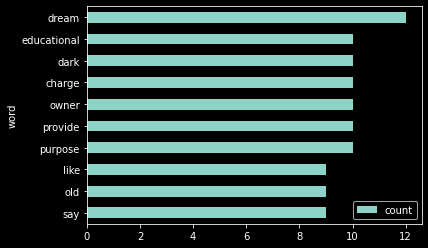

In [92]:
word_count_langston = pd.DataFrame({'word': vectorizer_langston.get_feature_names(), 'count': np.asarray(data_vectorized_langston.sum(axis=0))[0]})

word_count_langston.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')

# Frequent words used in Mary J Oliver poems

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


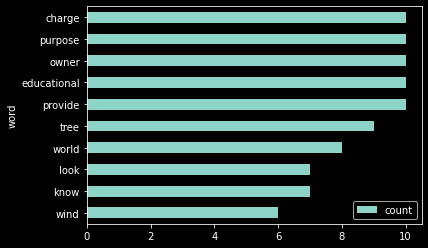

In [93]:
word_count_mary = pd.DataFrame({'word': vectorizer_mary.get_feature_names(), 'count': np.asarray(data_vectorized_mary.sum(axis=0))[0]})

word_count_mary.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')

#Name the Topics

In [94]:
def topicModeling(text1):
  text1_list_orig = []
  bigram_text1 = []
  corpus_text1 = []

  text1_list_orig = [gensim.utils.simple_preprocess(text1)]
  bigram_text1 = gensim.models.Phrases(text1_list_orig) # higher threshold fewer phrases.
  trigram_text1 = gensim.models.Phrases(bigram_text1[text1_list_orig])
  #remove stop words
  remove_stop_text1 = remove_stopwords(text1_list_orig)
  # Form Bigrams
  data_words_bigrams_text1 = make_bigrams(remove_stop_text1, bigram_text1)
  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized_text1 = lemmatization(data_words_bigrams_text1, allowed_postags=['NOUN']) # , 'ADJ', 'VERB', 'ADV'
  id2word_text1 = corpora.Dictionary(data_lemmatized_text1)

  # Term Document Frequency
  corpus_text1 = [id2word_text1.doc2bow(text) for text in data_lemmatized_text1]
  lda_model_text1 = gensim.models.LdaMulticore(corpus=corpus_text1,
                                       id2word=id2word_text1,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  doc_lda_text1 = lda_model_text1[corpus_text1]
  return lda_model_text1, corpus_text1, data_lemmatized_text1, id2word_text1



# **Conclusion**
Based on the frequency count of words, below are the top 3 topic names for both the poets:   
**Langston Hughes:** 
1. dream
2. educational
3. dark   

**Mary J Oliver:**
1. owner
2. provide
3. purpose

Based on the LDA weights, below are the top 3 topic names for both the poets:      
**Langston Hughes:** 
1. little 
2. purpose 
3. letter  

**Mary J Oliver:**
1. voice
2. earth
3. purpose

# References


1. https://github.com/aarsanjani/nlp-poets
2. https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
3. https://sjsu.instructure.com/courses/1465859/assignments/5992374
